#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import re

In [2]:
def getCsvFileName():
    """
    This function gets the CSV file name.
    This is so that the open file function does not have the name of the file hardcoded.
    """
    try:
        global file_name #Sets the file_name variable as global to be usable outside the function
        file_name = input("Enter the file name to open with a .csv: ")
    except Exception as msg:
        print('Operation could not be completed. File name not found')
        print(f'Error: {msg}')   
    

In [3]:
def openCsvFile():
    """
    Function calls the getCsv function
    Opens the file with the global variable.
    """
    getCsvFileName()
    global data #Sets the data variable as global to be usable outside the function
    data = pd.read_csv(file_name)

In [4]:
openCsvFile()

Enter the file name to open with a .csv: census_11_2022.csv


In [5]:
data.copy()

Unnamed: 0  House Number              Street  First Name     Surname  \
0              0             1      Marsh Turnpike       Megan        Bibi   
1              1             1      Marsh Turnpike      Callum        Bibi   
2              2             2      Marsh Turnpike      Leslie  Stephenson   
3              3             2      Marsh Turnpike       Katie  Stephenson   
4              4             3      Marsh Turnpike     Valerie    Houghton   
...          ...           ...                 ...         ...         ...   
8480        8480             1  Hollywood Windmill       Derek     Johnson   
8481        8481             1  Hollywood Windmill        Adam     Johnson   
8482        8482             1  Hollywood Windmill       Ricky     Johnson   
8483        8483             1  Hollywood Windmill     Bradley     Johnson   
8484        8484             1  Hollywood Windmill  Mark David     Johnson   

     Age Relationship to Head of House Marital Status  Gender  \
0     42                          Head       Divorced  Female   
1      4                   Adopted Son            NaN    Male   
2     52                          Head        Married    Male   
3     53                          Wife        Married  Female   
4     37                          Head        Married  Female   
...   ..                           ...            ...     ...   
8480  13                           Son            NaN    Male   
8481  12                           Son            NaN    Male   
8482  11                           Son            NaN    Male   
8483   6                           Son            NaN    Male   
8484   2                           Son            NaN    Male   

                             Occupation Infirmity   Religion  
0                   Retail merchandiser      None       None  
1                                 Child      None        NaN  
2     Research officer, political party      None  Christian  
3                            Unemployed      None       None  
4                   Magazine journalist      None  Christian  
...                                 ...       ...        ...  
8480                            Student      None        NaN  
8481                            Student      None        NaN  
8482                            Student      None        NaN  
8483                            Student      None        NaN  
8484                              Child      None        NaN  

[8485 rows x 12 columns]

In [6]:
data.head()

Unnamed: 0  House Number          Street First Name     Surname Age  \
0           0             1  Marsh Turnpike      Megan        Bibi  42   
1           1             1  Marsh Turnpike     Callum        Bibi   4   
2           2             2  Marsh Turnpike     Leslie  Stephenson  52   
3           3             2  Marsh Turnpike      Katie  Stephenson  53   
4           4             3  Marsh Turnpike    Valerie    Houghton  37   

  Relationship to Head of House Marital Status  Gender  \
0                          Head       Divorced  Female   
1                   Adopted Son            NaN    Male   
2                          Head        Married    Male   
3                          Wife        Married  Female   
4                          Head        Married  Female   

                          Occupation Infirmity   Religion  
0                Retail merchandiser      None       None  
1                              Child      None        NaN  
2  Research officer, political party      None  Christian  
3                         Unemployed      None       None  
4                Magazine journalist      None  Christian

In [7]:
data.describe(include='all')

Unnamed: 0  House Number         Street First Name Surname   Age  \
count   8485.00000   8485.000000           8485       8485    8485  8485   
unique         NaN           NaN            104        368     641   110   
top            NaN           NaN  Upland Street    Barbara   Smith    40   
freq           NaN           NaN            734         38     222   161   
mean    4242.00000     29.862345            NaN        NaN     NaN   NaN   
std     2449.55285     31.583394            NaN        NaN     NaN   NaN   
min        0.00000      1.000000            NaN        NaN     NaN   NaN   
25%     2121.00000      9.000000            NaN        NaN     NaN   NaN   
50%     4242.00000     21.000000            NaN        NaN     NaN   NaN   
75%     6363.00000     39.000000            NaN        NaN     NaN   NaN   
max     8484.00000    187.000000            NaN        NaN     NaN   NaN   

       Relationship to Head of House Marital Status  Gender Occupation  \
count                           8485           6420    8485       8485   
unique                            20              8       8       1076   
top                             Head         Single  Female    Student   
freq                            2830           2980    4384       1667   
mean                             NaN            NaN     NaN        NaN   
std                              NaN            NaN     NaN        NaN   
min                              NaN            NaN     NaN        NaN   
25%                              NaN            NaN     NaN        NaN   
50%                              NaN            NaN     NaN        NaN   
75%                              NaN            NaN     NaN        NaN   
max                              NaN            NaN     NaN        NaN   

       Infirmity Religion  
count       8485     6367  
unique         8       14  
top         None     None  
freq        8414     2729  
mean         NaN      NaN  
std          NaN      NaN  
min          NaN      NaN  
25%          NaN      NaN  
50%          NaN      NaN  
75%          NaN      NaN  
max          NaN      NaN

In [8]:
data.columns

Index(['Unnamed: 0', 'House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8485 non-null   int64 
 1   House Number                   8485 non-null   int64 
 2   Street                         8485 non-null   object
 3   First Name                     8485 non-null   object
 4   Surname                        8485 non-null   object
 5   Age                            8485 non-null   object
 6   Relationship to Head of House  8485 non-null   object
 7   Marital Status                 6420 non-null   object
 8   Gender                         8485 non-null   object
 9   Occupation                     8485 non-null   object
 10  Infirmity                      8485 non-null   object
 11  Religion                       6367 non-null   object
dtypes: int64(2), object(10)
memory usage: 795.6+ KB


In [10]:
data.columns

Index(['Unnamed: 0', 'House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [11]:
del data["Unnamed: 0"] #remove the 'Unnamed: 0' column. It's a column with serial numbers as the index 

In [12]:
data.isnull().any()

House Number                     False
Street                           False
First Name                       False
Surname                          False
Age                              False
Relationship to Head of House    False
Marital Status                    True
Gender                           False
Occupation                       False
Infirmity                        False
Religion                          True
dtype: bool

In [13]:
data.isnull().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2065
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2118
dtype: int64

In [14]:
data.shape #checks the dimension of the data

(8485, 11)

In [15]:
#data.Age.fillna(data.Age.median()) #to fill NaN fields with the median value

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8485 non-null   int64 
 1   Street                         8485 non-null   object
 2   First Name                     8485 non-null   object
 3   Surname                        8485 non-null   object
 4   Age                            8485 non-null   object
 5   Relationship to Head of House  8485 non-null   object
 6   Marital Status                 6420 non-null   object
 7   Gender                         8485 non-null   object
 8   Occupation                     8485 non-null   object
 9   Infirmity                      8485 non-null   object
 10  Religion                       6367 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.3+ KB


#### Above info shows that 'Age' was captured as object instead of int. Marital Status and Religion has less records i.e missing values.

In [17]:
data['Age'].value_counts(ascending =True)

98        1
94        1
Nine      1
102       1
90        1
       ... 
19      144
42      150
35      152
38      156
40      161
Name: Age, Length: 110, dtype: int64

### Age Column cleaning

In [18]:
age= data['Age'].unique()
print(age)

['42' '4' '52' '53' '37' '39' '1' '0' '40' '44' '46' '15' '12' '17' '16'
 '14' '13' '77' '35' '33' '27' '30' '54' '56' '59' '58' '55' '41' '36'
 '51' '24' '38' '9' '6' '50' '81' '78' '21' '28' '31' '5' '19' '48' '85'
 '88' '62' '63' '18' '10' '74' '72' '43' '32' '34' '47' '79' '60' '26'
 '61' '70' '67' '8' '69' '68' '2' '22' '25' '3' '11' '64' '83' '45' '7'
 '20' '89' '23' '76' '104' '101' '66' '57' '49' '71' '29' '95' '93' '65'
 '75' '103' '84' '105' ' ' '82' '80' '73' '87' '99' '100' '92' '91' '86'
 '97' '72.95086532' '90' '102' '96' 'Nine' '94' '50.60949693' '98']


##### Since I have only one occurence of Nine instead of 9 as shown above, I will go ahead and replace it with 9.

In [19]:
data['Age'] = data['Age'].replace(to_replace='Nine', value=9)

In [20]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['Street']).loc[data['Age']==' '])

House Number            Street First Name    Surname Age  \
421            42  Cambridge Avenue    Matthew  Gallagher       

    Relationship to Head of House Marital Status Gender  \
421                       Partner         Single   Male   

                  Occupation Infirmity Religion  
421  Agricultural consultant      None     None

In [21]:
data['Age']= pd.to_numeric(data['Age'] ,errors ='coerce', downcast ='integer') #Converts the strings to numeric

In [22]:
mean_of_adults = data.loc[data['Age'] >= 18, 'Age'].mean()

In [23]:
print(mean_of_adults)

43.98450371859903


In [24]:
data['Age'] = data['Age'].fillna(mean_of_adults)

#### Since I have only one occurence of empty string who is an adult. Mean ages of all adult is a good replacement of the empty string.

In [25]:
data['Age'].isna().sum()

0

In [26]:
data['Age'] = data['Age'].astype('int64') #Convert ages in float to int

In [27]:
age= data['Age'].unique()
print(age)

[ 42   4  52  53  37  39   1   0  40  44  46  15  12  17  16  14  13  77
  35  33  27  30  54  56  59  58  55  41  36  51  24  38   9   6  50  81
  78  21  28  31   5  19  48  85  88  62  63  18  10  74  72  43  32  34
  47  79  60  26  61  70  67   8  69  68   2  22  25   3  11  64  83  45
   7  20  89  23  76 104 101  66  57  49  71  29  95  93  65  75 103  84
 105  82  80  73  87  99 100  92  91  86  97  90 102  96  94  98]


The Age Column will be grouped

In [28]:
data.loc[data['Age'].between(0,4), 'Age Group'] = '0-4'
data.loc[data['Age'].between(5,9), 'Age Group'] = '5-9'
data.loc[data['Age'].between(10,14), 'Age Group'] = '10-14'
data.loc[data['Age'].between(15,19), 'Age Group'] = '15-19'
data.loc[data['Age'].between(20,24), 'Age Group'] = '20-24'
data.loc[data['Age'].between(25,29), 'Age Group'] = '25-29'
data.loc[data['Age'].between(30,34), 'Age Group'] = '30-34'
data.loc[data['Age'].between(35,39), 'Age Group'] = '35-39'
data.loc[data['Age'].between(40,44), 'Age Group'] = '40-44'
data.loc[data['Age'].between(45,49), 'Age Group'] = '45-49'
data.loc[data['Age'].between(50,54), 'Age Group'] = '50-54'
data.loc[data['Age'].between(55,59), 'Age Group'] = '55-59'
data.loc[data['Age'].between(60,64), 'Age Group'] = '60-64'
data.loc[data['Age'].between(65,69), 'Age Group'] = '65-69'
data.loc[data['Age'].between(70,74), 'Age Group'] = '70-74'
data.loc[data['Age'].between(75,79), 'Age Group'] = '75-79'
data.loc[data['Age'].between(80,84), 'Age Group'] = '80-84'
data.loc[data['Age'].between(85,89), 'Age Group'] = '85-89'
data.loc[data['Age'] >90, 'Age Group'] = 'Above 90'



#### I will clasify ages into group to help determine the population of  different categories of people and which will be used to suggest basic infrastructural needs

In [29]:
data.head()

House Number          Street First Name     Surname  Age  \
0             1  Marsh Turnpike      Megan        Bibi   42   
1             1  Marsh Turnpike     Callum        Bibi    4   
2             2  Marsh Turnpike     Leslie  Stephenson   52   
3             2  Marsh Turnpike      Katie  Stephenson   53   
4             3  Marsh Turnpike    Valerie    Houghton   37   

  Relationship to Head of House Marital Status  Gender  \
0                          Head       Divorced  Female   
1                   Adopted Son            NaN    Male   
2                          Head        Married    Male   
3                          Wife        Married  Female   
4                          Head        Married  Female   

                          Occupation Infirmity   Religion Age Group  
0                Retail merchandiser      None       None     40-44  
1                              Child      None        NaN       0-4  
2  Research officer, political party      None  Christian     50-54  
3                         Unemployed      None       None     50-54  
4                Magazine journalist      None  Christian     35-39

### Street column cleaning

In [30]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['House Number']).loc[data['Street']==' '])

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [31]:
data['Street'].isna().sum()

0

### First name column cleaning

In [32]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['Surname']).loc[data['First Name']==' '])

House Number              Street First Name   Surname  Age  \
3052            65  Capricornhall Lane             Mitchell   20   

     Relationship to Head of House Marital Status  Gender          Occupation  \
3052                      Daughter         Single  Female  University Student   

     Infirmity Religion Age Group  
3052      None     None     20-24

In [33]:
# For a missing first name and surname, we will replace with the string 'Not Available'
data['First Name'] = data['First Name'].replace(to_replace=' ', value='Not Available')

In [34]:
data['First Name'].isna().sum()

0

### Surname column cleaning

In [35]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['First Name']).loc[data['Surname']==' '])

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [36]:
data['Surname'].isnull().sum()

0

### Relationship to Head of House cleaning

In [37]:
data["Relationship to Head of House"].unique()

array(['Head', 'Adopted Son', 'Wife', 'Husband', 'Son', 'Cousin',
       'Daughter', 'None', 'Lodger', 'Granddaughter', 'Visitor',
       'Partner', 'Step-Daughter', 'Grandson', 'Sibling', ' ', 'Step-Son',
       'Adopted Daughter', 'Nephew', 'Neice'], dtype=object)

In [38]:
#Correcting the spelling of 'Neice' to 'Niece'
data['Relationship to Head of House'] = data['Relationship to Head of House'].replace(to_replace='Neice', value='Niece')

In [39]:
with pd.option_context("display.max_rows", None):
    display(data.loc[data['Relationship to Head of House']==' '])

House Number            Street First Name Surname  Age  \
406            31  Cambridge Avenue    Barbara  Dennis   81   

    Relationship to Head of House Marital Status  Gender  \
406                                      Married  Female   

                           Occupation Infirmity   Religion Age Group  
406  Retired Arts development officer      None  Christian     80-84

In [40]:
data[(data['House Number'] == 31) & (data['Street'] == 'Cambridge Avenue')]

House Number            Street First Name Surname  Age  \
405            31  Cambridge Avenue     Philip  Dennis   84   
406            31  Cambridge Avenue    Barbara  Dennis   81   

    Relationship to Head of House Marital Status  Gender  \
405                          Head        Married    Male   
406                                      Married  Female   

                                  Occupation Infirmity   Religion Age Group  
405  Retired Accountant, chartered certified      None  Christian     80-84  
406         Retired Arts development officer      None  Christian     80-84

#### The check above shows that the empty string on the 'Relationship to Head of House' is most likely a 'wife' as they have same surname and age bracket is quite close nd they stay in the same apartment. I will therefore update it to wife.

In [41]:
data['Relationship to Head of House'] = data['Relationship to Head of House'].replace(to_replace=' ', value='Wife')

In [42]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['Age']).loc[data['Relationship to Head of House']=='None'])

House Number                Street   First Name      Surname  Age  \
3596            10            Baker Road        James        Jones    1   
305             30       Bradford Avenue       Arthur       Jordan   13   
5107           106         Upland Street     Kathleen       Cooper   15   
867              1            Keeper Dam         Liam       Cooper   17   
1856             7       Worcester Drive         Ruth       French   18   
4183            29           Lion Street        Lewis     Williams   18   
5050            98         Upland Street          Sam         Ward   18   
5382             5     O'Brien Mountains       Kieran      Jenkins   18   
5383             5     O'Brien Mountains       Marion    Parkinson   18   
8055            43       Farthing Ridges      Kathryn      Roberts   18   
1855             7       Worcester Drive        Lydia        Singh   18   
6929             8           Glory Rapid         Jill         Cook   18   
3814            11           Kelly Route    Alexander        Hayes   18   
6344            66      Orchard Crescent     Margaret      Jackson   18   
7302            20      White Trafficway   Jacqueline    Tomlinson   18   
2181            35     Embankment Street        Aimee        Evans   18   
2191            37     Embankment Street  Christopher       Turner   18   
1879            15       Worcester Drive      Patrick        Smart   18   
7926             5       Farthing Ridges      Marilyn         Kaur   18   
5106           106         Upland Street        Jacob       Cooper   18   
6156             9      Orchard Crescent      Bernard        Brown   18   
1756            10       Sheffield Knoll         Jade      Vaughan   18   
1858             8       Worcester Drive        David       Rogers   18   
4052            46           Kelly Route          Ben       Harper   18   
7538             3      Bathhouse Bypass     Victoria      O'Brien   18   
7537             3      Bathhouse Bypass        Laura        Smith   18   
4074            49           Kelly Route        Scott         John   18   
7120            28       Strawberry Lane    Geraldine       Morris   18   
6477           109      Orchard Crescent        Robin        Booth   18   
2070             5     Embankment Street        Amber         Ross   18   
2071             5     Embankment Street        Henry     Metcalfe   18   
3304            49           Scott Union        Abdul      Watkins   18   
4892            75         Upland Street       Ronald       Winter   18   
4897            75         Upland Street        Shaun      Andrews   18   
3187            13           Scott Union      Shannon      Webster   18   
5048            98         Upland Street          Amy        Bowen   18   
6555           134      Orchard Crescent        Lydia     Robinson   18   
5267            18          Davison View        Tracy       Rogers   18   
6529           126      Orchard Crescent         Lucy       Wilson   18   
1637            35         Storm Mission     Margaret      Brookes   18   
1249            21            Zebra Lane        Abbie       Pearce   18   
1566             9         Storm Mission        Megan       Fisher   18   
3188            13           Scott Union          Joe       Turner   19   
3808            11           Kelly Route       Gerard     Phillips   19   
3809            11           Kelly Route         Anna      Edwards   19   
3812            11           Kelly Route         Karl      Collins   19   
764             16         Lisbon Stream    Alexander      Jackson   19   
5490            36     O'Brien Mountains        Brian       Walton   19   
5489            36     O'Brien Mountains        Jayne     Anderson   19   
2004            18           Stoke Ferry       Stuart        Marsh   19   
3815            11           Kelly Route        Paula   Hutchinson   19   
1466            20        Preston Avenue        Ellie        Smith   19   
5105           106         Upla

In [43]:
data['Relationship to Head of House'].isna().sum()

0

In [44]:
#Are there people below 18 who are head?
data.sort_values(by=['Age']).loc[(data['Relationship to Head of House']=='Head') & (data['Age']<18)]

House Number            Street First Name    Surname  Age  \
7512             8     Duffy Circles    Vanessa       Kirk   16   
6188            20  Orchard Crescent      Gemma  Alexander   17   

     Relationship to Head of House Marital Status  Gender  Occupation  \
7512                          Head         Single  Female  Unemployed   
6188                          Head        Married  Female     Student   

     Infirmity Religion Age Group  
7512      None      NaN     15-19  
6188      None      NaN     15-19

In [45]:
#Only 18years and above can be head of house
data.drop([6188,7512], axis=0, inplace=True)


### Marital Status column cleaning

In [46]:
data["Marital Status"].unique()

array(['Divorced', nan, 'Married', 'Single', 'Widowed', 'W', 'S', 'D',
       'M'], dtype=object)

####  Marital status and religion has missing fields from the above

#### There are 9 unique categorical entries including nan for marital status. Some were misrepresented with entries that referred to the same things : 'Divorced', nan, 'Married', 'Single', 'Widowed', 'W', 'S', 'D','M'. We will therefore match all D to Divorced , M to Married , W to Widowed  and S to Single

In [47]:
data['Marital Status'] = data['Marital Status'].replace(to_replace={"W","S","D","M"}, value={"Widowed","Single","Divorced","Married"})

In [48]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['Age']).loc[data['Marital Status'].isna()])

House Number                Street   First Name  \
1572            10         Storm Mission       Martyn   
5797            20          Eagle Divide       Janice   
5745             4          Eagle Divide      Kathryn   
8044            40       Farthing Ridges        Garry   
5739             2          Eagle Divide          Tom   
1295            32            Zebra Lane        Dylan   
1313            37            Zebra Lane       Bethan   
8067            47       Farthing Ridges         Jade   
1357            46            Zebra Lane    Stephanie   
8080             4            Carey Port      Mohamed   
1369            49            Zebra Lane       Eileen   
5475            32     O'Brien Mountains         June   
5439            22     O'Brien Mountains      Dorothy   
5364            37           Lomond Cove     Kathleen   
5317            17           Lomond Cove       Nathan   
5175           117         Upland Street       Eileen   
5174           117         Upland Street        Scott   
5084           103         Upland Street        Roger   
4391            17            Wells Lane        Nigel   
1908            23       Worcester Drive    Kimberley   
1883            16       Worcester Drive        Aaron   
4512            10         Upland Street        Bryan   
4525            12         Upland Street      Jessica   
1828            38       Sheffield Knoll        Paula   
8036            38       Farthing Ridges         Jade   
4606            27         Upland Street      Stephen   
4659            37         Upland Street        Conor   
1716            22          Hammond Lane         Ryan   
1671             9          Hammond Lane      Shannon   
4975            88         Upland Street          Ann   
4985            89         Upland Street      Kenneth   
8147            31            Carey Port       Andrea   
4646            36         Upland Street         Jill   
4267            24          London Drive      Vincent   
5897            28            Wharf Road       Joshua   
5912            33            Wharf Road       Alison   
7840            49             Kemp Road       Julian   
7839            49             Kemp Road    Catherine   
300             29       Bradford Avenue          Ben   
314             34       Bradford Avenue        Abbie   
7620             4  Aethelredpart Avenue      Richard   
7583            13        Robertson Mall        Carol   
396             25      Cambridge Avenue         Luke   
7518             9         Duffy Circles         Katy   
7513             8         Duffy Circles        Carly   
7511             7         Duffy Circles       Norman   
7377            32      White Trafficway        Jayne   
527              6          Pratt Street       Janice   
532              8          Pratt Street        Alice   
7266            13      White Trafficway        Diane   
569             19          Pratt Street       Lauren   
609             33          Pratt Street       Samuel   
6908             1           Glory Rapid         Alan   
5924            36            Wharf Road      Suzanne   
6099             6            Wells Lane         Toby   
6236            35      Orchard Crescent      Raymond   
6262            42      Orchard Crescent        Louis   
6284            47      Orchard Crescent        Jodie   
984             36        Derbytag Drive        Paige   
5898            28            Wharf Road      Natalie   
943             20        Derbytag Drive      Barbara   
6636           161      Orchard Crescent       Carole   
6680           171      Orchard Crescent       Duncan   
792             25         Lisbon Stream         Rita   
6707           179      Orchard Crescent      Jeffrey   
6741             2           Shark Drive         Toby   
6879             9           Beech Ferry        Lynne   
850              1         Victoria Pine    Elizabeth   
4140            11           Lion Street     Danielle   
7849            

#### All nan in the Marital status field are people below 18. Hence, nan can be replaced with a new category 'Not Applicable'

In [49]:
data['Marital Status'] = data['Marital Status'].fillna('Not Applicable')

In [50]:
data["Marital Status"].unique()

array(['Divorced', 'Not Applicable', 'Married', 'Single', 'Widowed'],
      dtype=object)

### Gender column cleaning

In [51]:
data['Gender'].unique()

array(['Female', 'Male', 'male', 'M', 'm', 'female', 'f', 'F'],
      dtype=object)

#### There are duplicated unique categorical entries including for gender. Some were misrepresented with entries that referred to the same things like f or F for Female and m or M for Male. I will therefore match all m,M and male to Male and f,F and female to Female

In [52]:
data["Gender"] = data["Gender"].replace({"m" : "Male", "M" : "Male", "male": "Male", "f": "Female", "F": "Female", "female": "Female"})

### Occupation column cleaning

In [53]:
data['Occupation'].unique()

array(['Retail merchandiser', 'Child',
       'Research officer, political party', ...,
       'Retired Research officer, political party',
       'Retired Prison officer',
       'Retired Production designer, theatre/television/film'],
      dtype=object)

In [54]:
data.sort_values(by=['Age']).loc[data['Occupation']==' ']

House Number          Street First Name Surname  Age  \
4433             3  Causeway Track     Nathan  Knight   24   

     Relationship to Head of House Marital Status Gender Occupation Infirmity  \
4433                           Son         Single   Male                 None   

     Religion Age Group  
4433     None     20-24

In [55]:
data['Occupation']= data['Occupation'].str.replace(re.compile(".*[Rr]etired.*"),'Retired')



In [56]:
data['Occupation'].unique()

array(['Retail merchandiser', 'Child',
       'Research officer, political party', 'Unemployed',
       'Magazine journalist', 'Theatre manager', 'Animator',
       'Surveyor, commercial/residential', 'Administrator, sports',
       'Occupational hygienist', 'Tourist information centre manager',
       'Merchandiser, retail', 'Student', 'Tree surgeon',
       'Consulting civil engineer', 'Education officer, museum',
       'Veterinary surgeon', 'Public affairs consultant',
       'Pension scheme manager', 'Engineer, water', 'Fine artist',
       'Teacher, secondary school', 'Secondary school teacher',
       'Trading standards officer', 'Chief Executive Officer',
       'Economist', 'Surveyor, quantity', 'Personnel officer',
       'Editorial assistant',
       'Historic buildings inspector/conservation officer',
       'Scientist, research (life sciences)', 'Quarry manager',
       'Sports therapist', 'Public librarian', "Politician's assistant",
       'Production assistant, radio', 

In [57]:
# For a missing first name and surname, we will replace with the string 'Not Available'
data['Occupation'] = data['Occupation'].replace(to_replace=' ', value='Not Available')

In [58]:
# Recoding the occupation to limited categorical variable including the 'Not Available' which is subsequently filled with the modal class
recode_occupation = np.where( (data['Occupation']!= 'Child' ) & (data['Occupation']!= 'Student' ) & (data['Occupation']!= 'PhD Student' ) & (data['Occupation']!= 'University Student' ) & (data['Occupation']!= 'Retired' ) & (data['Occupation']!= 'Unemployed') & (data['Occupation']!= 'Not Available') , 'Employed',data['Occupation'] )
data['Occupation']= recode_occupation

In [59]:
data['Occupation'].unique()

array(['Employed', 'Child', 'Unemployed', 'Student', 'Retired',
       'University Student', 'PhD Student', 'Not Available'], dtype=object)

In [60]:
# Recoding all categories of students into one
recode_student = np.where( (data['Occupation']== 'PhD Student' ), 'University Student',data['Occupation'] )
data['Occupation']= recode_student

In [61]:

occup_mode_20_29 = data.loc[(data['Age'] >= 20) & (data['Age'] <= 29), 'Occupation'].mode()
print(occup_mode_20_29)

0    Employed
Name: Occupation, dtype: object


In [62]:
data['Occupation'] = data['Occupation'].replace(to_replace='Not Available', value='Employed')

In [63]:
data['Occupation'].unique()

array(['Employed', 'Child', 'Unemployed', 'Student', 'Retired',
       'University Student'], dtype=object)

In [64]:
#Are there underaged employed people?
data.sort_values(by=['Age']).loc[(data['Occupation']=='Employed') & (data['Age']<18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

### Infirmity Column cleaning

In [65]:
data["Infirmity"].unique()

array(['None', 'Blind', 'Unknown Infection', 'Disabled', 'Deaf',
       'Physical Disability', ' ', 'Mental Disability'], dtype=object)

In [66]:
data.sort_values(by=['Age']).loc[data['Infirmity']==' ']

House Number              Street First Name   Surname  Age  \
4483             6       Upland Street   Georgina      Shah   12   
7703             1           Kemp Road     Gareth   Gregory   17   
7321            23    White Trafficway    Shannon   Leonard   39   
802              5          Green Road     Joanna    Hughes   46   
2923            29  Capricornhall Lane        Ian    Sharpe   49   
3793             8         Kelly Route    Cameron      Ryan   57   
2259            27         August Lane    Melanie   Collins   58   
2208             6         August Lane    Abigail  O'Connor   62   
4537            15       Upland Street        Ben    Curtis   63   

     Relationship to Head of House  Marital Status  Gender Occupation  \
4483                      Daughter  Not Applicable  Female    Student   
7703                           Son  Not Applicable    Male    Student   
7321                      Daughter         Widowed  Female   Employed   
802                           None          Single  Female   Employed   
2923                        Lodger          Single    Male   Employed   
3793                        Lodger          Single    Male   Employed   
2259                          Head          Single  Female   Employed   
2208                          Wife         Married  Female   Employed   
4537                       Partner          Single    Male   Employed   

     Infirmity   Religion Age Group  
4483                  NaN     10-14  
7703                  NaN     15-19  
7321             Catholic     35-39  
802                  None     45-49  
2923                 None     45-49  
3793            Christian     55-59  
2259            Christian     55-59  
2208            Christian     60-64  
4537                 None     60-64

#### 9 records have blank emty strings under the 'Infirmity' column. The best is to assign the modal class to these few records.

In [67]:
mode_of_infirmity = data['Infirmity'].mode()
print(mode_of_infirmity)

0    None
Name: Infirmity, dtype: object


In [68]:
data['Infirmity'] = data['Infirmity'].replace(to_replace=' ', value='None')


### Religion column cleaning

In [69]:
data["Religion"].unique()

array(['None', nan, 'Christian', 'Catholic', 'Methodist', 'Muslim',
       'Jewish', 'Sikh', 'Private', 'Nope', 'Buddist', 'Orthodoxy',
       'Jedi', 'Hindu', 'Pagan'], dtype=object)

#### Searches show that there is no religion called 'Nope'. The closest in the categorical options above will be 'None' meaning 'no religion'. I will place this Husband and wife there.

In [70]:
data['Religion'] = data['Religion'].replace(to_replace='Nope', value='None') #Replace 'Nope' with 'None'

In [71]:
data.sort_values(by=['Age']).loc[data['Religion']=='Private']

House Number         Street First Name Surname  Age  \
1585            15  Storm Mission   Margaret   Green   29   

     Relationship to Head of House Marital Status  Gender Occupation  \
1585                          Head         Single  Female   Employed   

     Infirmity Religion Age Group  
1585      None  Private     25-29

In [72]:
data.sort_values(by=['Age']).loc[(data['Street']=='Storm Mission') & (data['House Number']==15)]

House Number         Street First Name Surname  Age  \
1586            15  Storm Mission        Kim   Green   10   
1585            15  Storm Mission   Margaret   Green   29   

     Relationship to Head of House  Marital Status  Gender Occupation  \
1586                      Daughter  Not Applicable  Female    Student   
1585                          Head          Single  Female   Employed   

     Infirmity Religion Age Group  
1586      None      NaN     10-14  
1585      None  Private     25-29

In [73]:
data.sort_values(by=['Age']).loc[data['Religion'].isna()]

House Number            Street First Name  Surname  Age  \
1572            10     Storm Mission     Martyn   Storey    0   
5797            20      Eagle Divide     Janice     Ford    0   
5745             4      Eagle Divide    Kathryn  Bentley    0   
8044            40   Farthing Ridges      Garry  Howells    0   
5739             2      Eagle Divide        Tom     Hill    0   
...            ...               ...        ...      ...  ...   
6556           134  Orchard Crescent     Adrian   Norris   20   
3296            46       Scott Union     George    Smith   20   
6289            48  Orchard Crescent       Gail     Dodd   21   
6833            39        Eagle Lane      Tracy  Elliott   22   
5990             5   Palmtree Street     Arthur      Lee   25   

     Relationship to Head of House  Marital Status  Gender  \
1572                           Son  Not Applicable    Male   
5797                      Daughter  Not Applicable  Female   
5745                      Daughter  Not Applicable  Female   
8044                           Son  Not Applicable    Male   
5739                           Son  Not Applicable    Male   
...                            ...             ...     ...   
6556                          None          Single    Male   
3296                          None          Single    Male   
6289                          None          Single  Female   
6833                          Wife         Married  Female   
5990                          None          Single    Male   

              Occupation Infirmity Religion Age Group  
1572               Child      None      NaN       0-4  
5797               Child      None      NaN       0-4  
5745               Child      None      NaN       0-4  
8044               Child      None      NaN       0-4  
5739               Child      None      NaN       0-4  
...                  ...       ...      ...       ...  
6556  University Student      None      NaN     20-24  
3296  University Student      None      NaN     20-24  
6289  University Student      None      NaN     20-24  
6833  University Student      None      NaN     20-24  
5990  University Student      None      NaN     25-29  

[2116 rows x 12 columns]

#### Children below the age of 18  have no religion captured. In compliance to the freedom to choose and practice a religion protected by article 14 of the Convention on the Rights of the Child: “States Parties shall respect the right of the child to freedom of thought, conscience and religion, I will replace it with 'Not Applicable'

In [74]:
replace_minor_religion = np.where( (data['Age']<= 17 ) & (data['Religion'].isna()), 'Not Applicable',data['Religion'] )
data['Religion']= replace_minor_religion

In [75]:
with pd.option_context("display.max_rows", None):
    display(data.sort_values(by=['Age']).loc[data['Religion'].isna()])

House Number               Street First Name    Surname  Age  \
2825            26       Smith Turnpike   Mohammad      Burns   18   
4052            46          Kelly Route        Ben     Harper   18   
2442            23         Henge Avenue       Jack     Barber   18   
7903            23         Dockers Lane     Marcus     Clarke   18   
5388             7    O'Brien Mountains       Ryan    Barrett   18   
3372            26         Paris Unions    Stephen    Godfrey   18   
2181            35    Embankment Street      Aimee      Evans   18   
7981            22      Farthing Ridges    Charlie   Williams   18   
5267            18         Davison View      Tracy     Rogers   18   
6909             1          Glory Rapid      Maria     Hughes   18   
1773            17      Sheffield Knoll     Callum     Walker   18   
1291            31           Zebra Lane      David     Davies   18   
168              5  Cottinghamnail Road    Richard    Brennan   18   
8396             1      Dixon Institute   Jennifer      Lewis   18   
6156             9     Orchard Crescent    Bernard      Brown   18   
6929             8          Glory Rapid       Jill       Cook   18   
3627            19           Baker Road       Alan      James   18   
8427             1    Chapman Longhouse   Mitchell    Barrett   18   
4651            36        Upland Street      Jenna     Davies   18   
6992            24           Kemp Drive     Joanna      Parry   18   
2591            48        Connolly Road      Bruce      Booth   18   
3875            19          Kelly Route       Dean     Wright   18   
2285            37          August Lane     Jordan    Randall   18   
2815            23       Smith Turnpike      Gavin   Phillips   18   
1756            10      Sheffield Knoll       Jade    Vaughan   18   
8055            43      Farthing Ridges    Kathryn    Roberts   18   
748             12        Lisbon Stream      Ellie      Moore   18   
8434             1         King Bastion     Andrew      Kelly   18   
7819            42            Kemp Road     Callum     Morgan   18   
4183            29          Lion Street      Lewis   Williams   18   
2485             5           Music Road   Nicholas      Hobbs   18   
4119             6          Lion Street   Danielle       King   18   
7120            28      Strawberry Lane  Geraldine     Morris   18   
6832            39           Eagle Lane    Russell    Elliott   18   
7391            34     White Trafficway    Anthony   Harrison   18   
1637            35        Storm Mission   Margaret    Brookes   18   
280             21      Bradford Avenue    Francis    Knowles   18   
1858             8      Worcester Drive      David     Rogers   18   
1566             9        Storm Mission      Megan     Fisher   18   
4074            49          Kelly Route      Scott       John   18   
1627            32        Storm Mission  Kimberley    Gregory   18   
2816            23       Smith Turnpike      Chloe   Phillips   19   
281             21      Bradford Avenue  Geraldine    Knowles   19   
1628            32        Storm Mission     Gordon    Gregory   19   
6189            20     Orchard Crescent     Albert  Alexander   19   
8397             1      Dixon Institute    Stephen      Lewis   19   
6556           134     Orchard Crescent     Adrian     Norris   20   
3296            46          Scott Union     George      Smith   20   
6289            48     Orchard Crescent       Gail       Dodd   21   
6833            39           Eagle Lane      Tracy    Elliott   22   
5990             5      Palmtree Street     Arthur        Lee   25   

     Relationship to Head of House Marital Status  Gender          Occupation  \
2825                        Lodger       Divorced    Male             Student   
4052                          None         Single    Male             Student   
2442                          Head        Widowed    Male             Student   
7903                          Head       

#### Some adult age 18 and above have no religion captured. I will replace it with 'Not Available'. 
##### This is considering the freedom of religion and belief. Article 18 of the UN Universal Declaration of Human Rights, adopted in 1948, states that ‘everyone has the right to freedom of thought, conscience and religion’ - Source: Freedom of religion or belief: understanding this human right - GOV.UK (www.gov.uk)

In [76]:
replace_adult_religion = np.where( (data['Age']>= 18 ) & (data['Religion'].isna()), 'Not Available',data['Religion'] )
data['Religion']= replace_adult_religion

#### Research also shows that there are 6 major religions in the UK including Islam, Hinduism, Sikhism, Judaism and Buddhism, and Chritian. We will group others in the 'others' category and also have the 'None' as a category as well.
#### Some categories are denominations rather that religions.

In [77]:
data['Religion'].unique()

array(['None', 'Not Applicable', 'Christian', 'Catholic', 'Methodist',
       'Muslim', 'Not Available', 'Jewish', 'Sikh', 'Private', 'Buddist',
       'Orthodoxy', 'Jedi', 'Hindu', 'Pagan'], dtype=object)

In [78]:
religion = np.where((data['Religion']=='Private')| (data['Religion']=='Orthodoxy')| (data['Religion']=='Jedi')| (data['Religion']=='Pagan'), 'Other Religion',data['Religion'] )
data['Religion']= religion
data['Religion'].unique()

array(['None', 'Not Applicable', 'Christian', 'Catholic', 'Methodist',
       'Muslim', 'Not Available', 'Jewish', 'Sikh', 'Other Religion',
       'Buddist', 'Hindu'], dtype=object)

In [79]:
data[0:100]

House Number          Street First Name     Surname  Age  \
0              1  Marsh Turnpike      Megan        Bibi   42   
1              1  Marsh Turnpike     Callum        Bibi    4   
2              2  Marsh Turnpike     Leslie  Stephenson   52   
3              2  Marsh Turnpike      Katie  Stephenson   53   
4              3  Marsh Turnpike    Valerie    Houghton   37   
..           ...             ...        ...         ...  ...   
95            31  Marsh Turnpike    Russell    Robinson   44   
96            31  Marsh Turnpike       Sian    Robinson   13   
97            32  Marsh Turnpike     Hayley    Williams   32   
98            32  Marsh Turnpike     Thomas    Williams   34   
99            33  Marsh Turnpike       Leah      Turner   56   

   Relationship to Head of House  Marital Status  Gender  Occupation  \
0                           Head        Divorced  Female    Employed   
1                    Adopted Son  Not Applicable    Male       Child   
2                           Head         Married    Male    Employed   
3                           Wife         Married  Female  Unemployed   
4                           Head         Married  Female    Employed   
..                           ...             ...     ...         ...   
95                       Husband         Married    Male    Employed   
96                      Daughter  Not Applicable  Female     Student   
97                          Head         Married  Female    Employed   
98                       Husband         Married    Male    Employed   
99                          Head          Single  Female    Employed   

   Infirmity        Religion Age Group  
0       None            None     40-44  
1       None  Not Applicable       0-4  
2       None       Christian     50-54  
3       None            None     50-54  
4       None       Christian     35-39  
..       ...             ...       ...  
95      None       Christian     40-44  
96      None  Not Applicable     10-14  
97      None            None     30-34  
98      None            None     30-34  
99      None            None     55-59  

[100 rows x 12 columns]

In [80]:
data.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Age Group                        1
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8483 entries, 0 to 8484
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8483 non-null   int64 
 1   Street                         8483 non-null   object
 2   First Name                     8483 non-null   object
 3   Surname                        8483 non-null   object
 4   Age                            8483 non-null   int64 
 5   Relationship to Head of House  8483 non-null   object
 6   Marital Status                 8483 non-null   object
 7   Gender                         8483 non-null   object
 8   Occupation                     8483 non-null   object
 9   Infirmity                      8483 non-null   object
 10  Religion                       8483 non-null   object
 11  Age Group                      8482 non-null   object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [82]:
with pd.option_context("display.max_rows", None):
    display(data)

House Number                Street     First Name  \
0                1        Marsh Turnpike          Megan   
1                1        Marsh Turnpike         Callum   
2                2        Marsh Turnpike         Leslie   
3                2        Marsh Turnpike          Katie   
4                3        Marsh Turnpike        Valerie   
5                3        Marsh Turnpike          Danny   
6                3        Marsh Turnpike         Donald   
7                3        Marsh Turnpike         Graeme   
8                4        Marsh Turnpike         Damian   
9                4        Marsh Turnpike          Helen   
10               5        Marsh Turnpike         Lauren   
11               5        Marsh Turnpike         Mathew   
12               6        Marsh Turnpike          Helen   
13               6        Marsh Turnpike          Shane   
14               6        Marsh Turnpike      Elizabeth   
15               6        Marsh Turnpike         Oliver   
16               6        Marsh Turnpike           Toby   
17               7        Marsh Turnpike          Grace   
18               7        Marsh Turnpike       Mohammad   
19               7        Marsh Turnpike          Clive   
20               7        Marsh Turnpike           Josh   
21               7        Marsh Turnpike        Natasha   
22               8        Marsh Turnpike          Laura   
23               8        Marsh Turnpike        Cameron   
24               8        Marsh Turnpike        Natalie   
25               8        Marsh Turnpike        Stanley   
26               8        Marsh Turnpike          Rosie   
27               9        Marsh Turnpike        Abigail   
28               9        Marsh Turnpike        Phillip   
29              10        Marsh Turnpike        Gillian   
30              10        Marsh Turnpike         Howard   
31              10        Marsh Turnpike         Yvonne   
32              11        Marsh Turnpike       Georgina   
33              11        Marsh Turnpike         Howard   
34              12        Marsh Turnpike         Ronald   
35              13        Marsh Turnpike          Emily   
36              13        Marsh Turnpike         Andrea   
37              13        Marsh Turnpike           Dale   
38              13        Marsh Turnpike          Ricky   
39              13        Marsh Turnpike      Christine   
40              14        Marsh Turnpike          David   
41              14        Marsh Turnpike            Joe   
42              14        Marsh Turnpike        Georgia   
43              15        Marsh Turnpike           June   
44              15        Marsh Turnpike       Benjamin   
45              15        Marsh Turnpike         Hilary   
46              16        Marsh Turnpike          Paula   
47              16        Marsh Turnpike       Lawrence   
48              16        Marsh Turnpike        Dominic   
49              16        Marsh Turnpike           Gail   
50              17        Marsh Turnpike           Jack   
51              17        Marsh Turnpike           Leon   
52              17        Marsh Turnpike            Jay   
53              17        Marsh Turnpike          Clive   
54              18        Marsh Turnpike        William   
55              19        Marsh Turnpike            Zoe   
56              19        Marsh Turnpike            Joe   
57              19        Marsh Turnpike         Victor   
58              19        Marsh Turnpike          Susan   
59              19        Marsh Turnpike         Steven   
60              20        Marsh Turnpike        Charles   
61              20        Marsh Turnpike        Natasha   
62              20        Marsh Turnpike         Eileen   
63              20        Marsh Turnpike          Clare   
64              20        Marsh Turnpike        Natalie   
65              20        Marsh Turnpike        Abigail   
66              21        Marsh Turnpike           Je

Observation checks after cleaning

In [83]:
#Are there underaged married people?
data.sort_values(by=['Age']).loc[(data['Marital Status']=='Married') & (data['Age']<18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

In [84]:
#Are there people below 18 who have a religion?
data.sort_values(by=['Age']).loc[(data['Religion']!='Not Applicable') & (data['Age']<18)]

Empty DataFrame
Columns: [House Number, Street, First Name, Surname, Age, Relationship to Head of House, Marital Status, Gender, Occupation, Infirmity, Religion, Age Group]
Index: []

### Visualisation

In [85]:
import plotly.graph_objects as gp

In [86]:
%matplotlib inline

Text(0.5, 1.0, 'Age distribution')

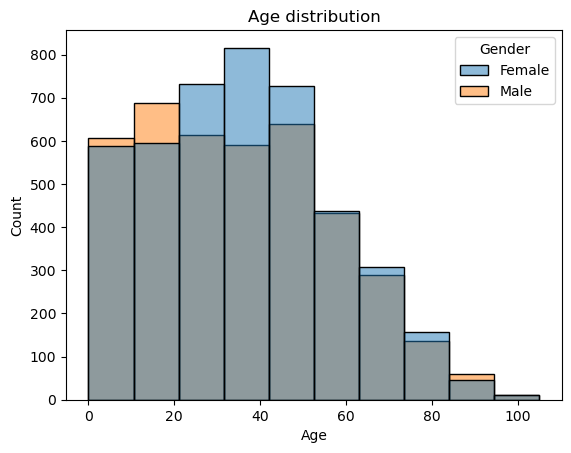

In [87]:
sns.histplot(data=data, x='Age', hue='Gender', bins=10)
plt.title('Age distribution')

Text(0.5, 1.0, 'Infirmity by Age distribution')

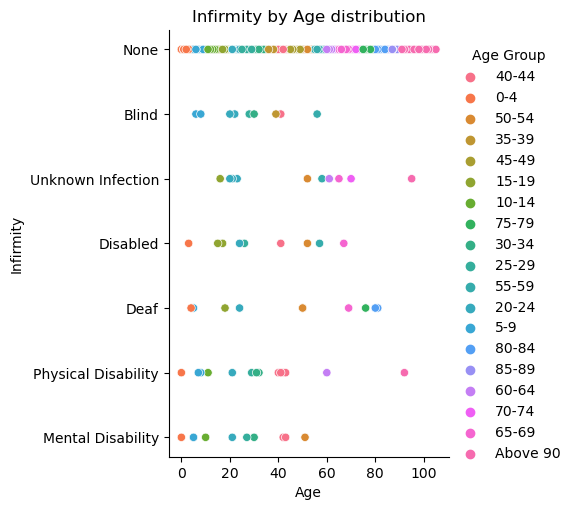

In [88]:
sns.relplot(data=data, x='Age',y='Infirmity', hue='Age Group')
plt.title('Infirmity by Age distribution')

Text(0.5, 1.0, 'Religion count by gender')

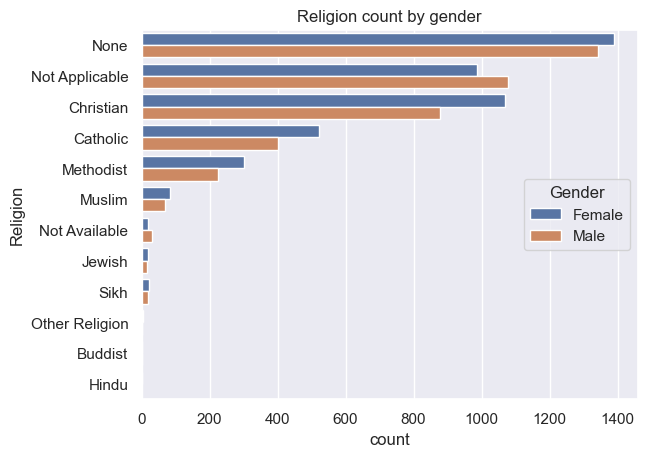

In [89]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Religion", data=data, hue='Gender' )
plt.title('Religion count by gender')

Text(0.5, 1.0, 'Occupation count')

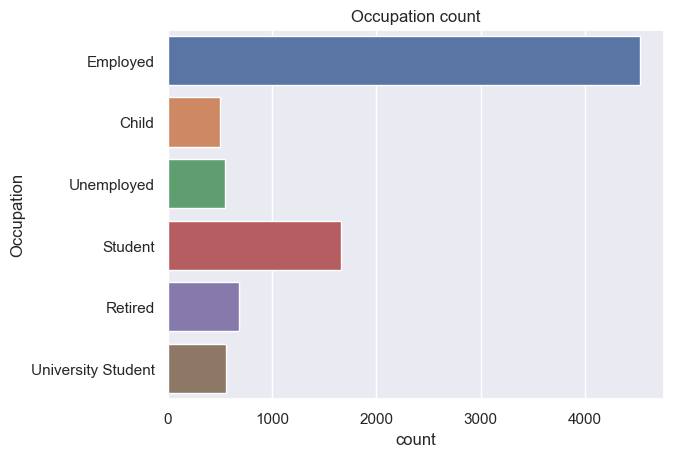

In [90]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Occupation", data=data )
plt.title('Occupation count')

Text(0.5, 1.0, 'Occupation Age distribution')

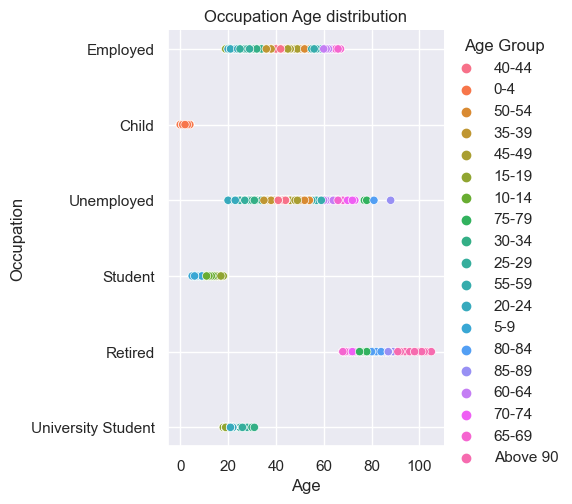

In [91]:
sns.relplot(data=data, x='Age',y='Occupation', hue='Age Group')
plt.title('Occupation Age distribution')

Text(0.5, 1.0, 'Religion by Age')

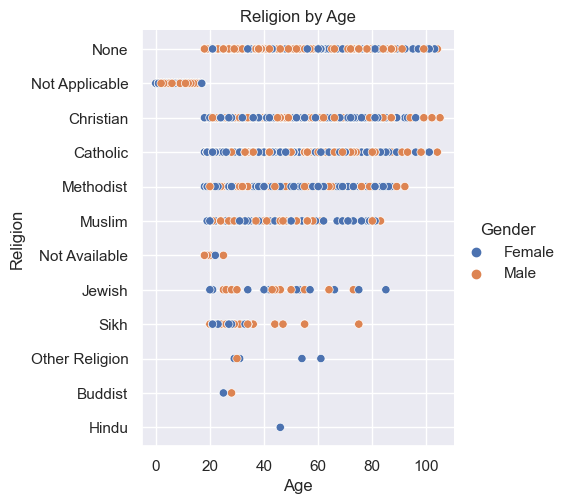

In [92]:
sns.relplot(data=data, x="Age", y="Religion", hue="Gender")
plt.title('Religion by Age')

Text(0.5, 1.0, 'Religion by Age')

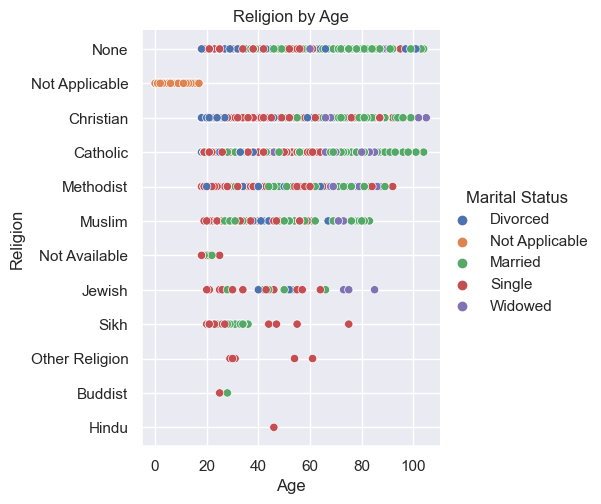

In [93]:
sns.relplot(data=data, x="Age", y="Religion", hue="Marital Status")
plt.title('Religion by Age')

Text(0.5, 1.0, 'House composition')

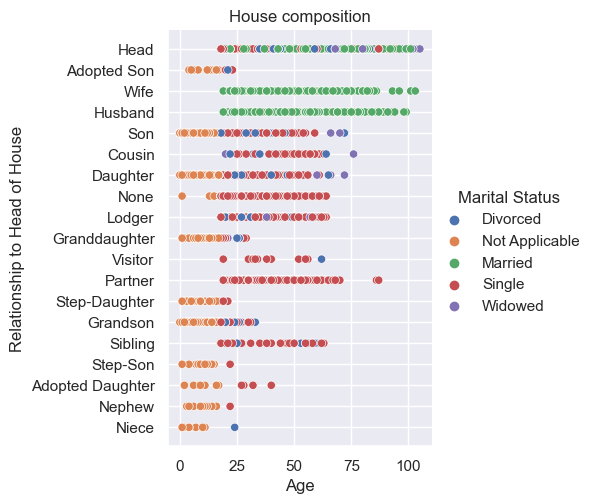

In [94]:
sns.relplot(data=data,x="Age",  y="Relationship to Head of House", hue="Marital Status")
plt.title('House composition')

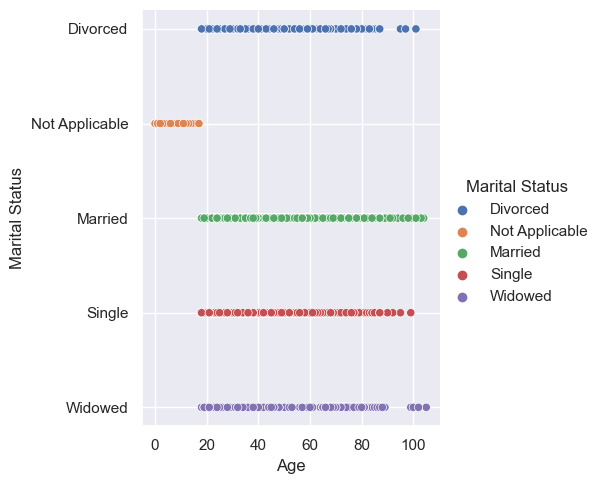

In [95]:
sns.relplot(data=data,x="Age",  y="Marital Status", hue="Marital Status")

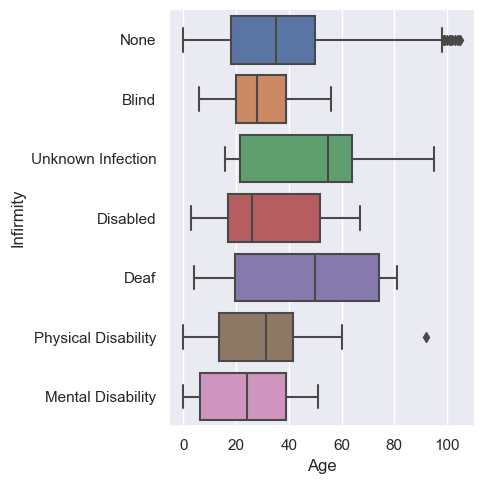

In [96]:

sns.catplot(data=data, x="Age", y="Infirmity", kind='box')

In [97]:
data.sort_values(by=['Age']).loc[(data['Infirmity']=='Physical Disability') & (data['Age']>80)]

House Number       Street First Name Surname  Age  \
2224            13  August Lane       Rita     Lee   92   

     Relationship to Head of House Marital Status  Gender Occupation  \
2224                          Head         Single  Female    Retired   

                Infirmity   Religion Age Group  
2224  Physical Disability  Christian  Above 90

In [98]:
data.sort_values(by=['Age']).loc[(data['Street']=='August Lane') & (data['House Number']==13)]

House Number       Street First Name Surname  Age  \
2224            13  August Lane       Rita     Lee   92   

     Relationship to Head of House Marital Status  Gender Occupation  \
2224                          Head         Single  Female    Retired   

                Infirmity   Religion Age Group  
2224  Physical Disability  Christian  Above 90

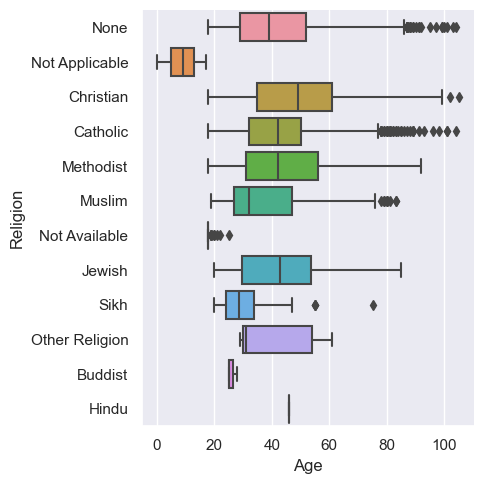

In [99]:
sns.catplot(data=data,x='Age' ,y="Religion", kind='box')

### Population Pyramid

In [100]:
male_count = data['Gender'].value_counts()['Male']
female_count = data['Gender'].value_counts()['Female']
print(f'Male: {male_count}')
print(f'Female: {female_count}')

Male: 4065
Female: 4418


In [101]:
data.groupby('Gender')['Age Group'].count()

Gender
Female    4418
Male      4064
Name: Age Group, dtype: int64

In [102]:
data.groupby(['Gender','Age Group'])['Age Group'].count()

Gender  Age Group
Female  0-4          248
        10-14        253
        15-19        325
        20-24        323
        25-29        325
        30-34        392
        35-39        407
        40-44        402
        45-49        301
        5-9          294
        50-54        293
        55-59        219
        60-64        191
        65-69        147
        70-74        102
        75-79         85
        80-84         63
        85-89         34
        Above 90      14
Male    0-4          249
        10-14        355
        15-19        317
        20-24        288
        25-29        272
        30-34        292
        35-39        307
        40-44        297
        45-49        310
        5-9          300
        50-54        258
        55-59        213
        60-64        195
        65-69        109
        70-74        113
        75-79         71
        80-84         66
        85-89         36
        Above 90      16
Name: Age Group, dtype: int64

In [103]:
pop_pyramid = pd.pivot_table(data,values='Age', index='Age Group', columns='Gender', aggfunc='count')
pop_pyramid= pop_pyramid.reset_index().set_index('Age Group')
pop_pyramid

Gender     Female  Male
Age Group              
0-4           248   249
10-14         253   355
15-19         325   317
20-24         323   288
25-29         325   272
30-34         392   292
35-39         407   307
40-44         402   297
45-49         301   310
5-9           294   300
50-54         293   258
55-59         219   213
60-64         191   195
65-69         147   109
70-74         102   113
75-79          85    71
80-84          63    66
85-89          34    36
Above 90       14    16

In [104]:
male_population = pop_pyramid['Male'].to_list()
neg_male_population = [x*-1 for x in male_population]
print(neg_male_population)

[-249, -355, -317, -288, -272, -292, -307, -297, -310, -300, -258, -213, -195, -109, -113, -71, -66, -36, -16]


In [105]:
female_population = pop_pyramid['Female'].to_list()
print(female_population)

[248, 253, 325, 323, 325, 392, 407, 402, 301, 294, 293, 219, 191, 147, 102, 85, 63, 34, 14]


In [106]:
index = pop_pyramid.index.to_list()
print(index)

['0-4', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '5-9', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', 'Above 90']


[Text(0.5, 0, 'Population Count'), Text(0, 0.5, 'Age Group')]

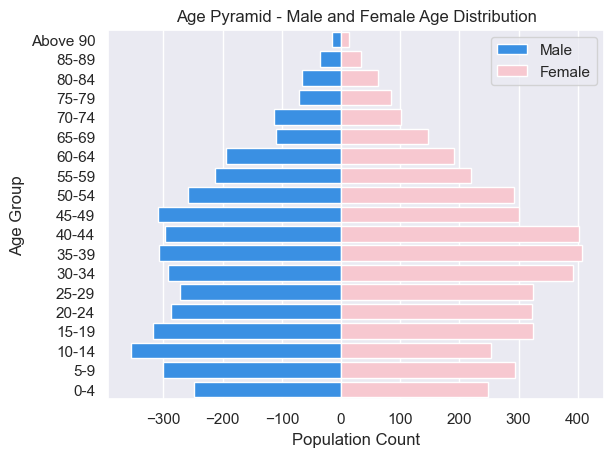

In [107]:
AgeGroup =['Above 90','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
pyramid_data = pd.DataFrame({'Age':index, 'Male':neg_male_population, 'Female':female_population})
age_pyramid =sns.barplot(data=pyramid_data ,x=neg_male_population, y=index, order =AgeGroup, color=('dodgerblue'), label='Male')
age_pyramid =sns.barplot(data=pyramid_data ,x=female_population, y=index, order= AgeGroup, color=('pink'), label='Female')
plt.title('Age Pyramid - Male and Female Age Distribution')
age_pyramid.legend()
age_pyramid.set(xlabel='Population Count', ylabel='Age Group')

In [108]:
young_dependent = data.loc[(data['Age'] >= 0) & (data['Age'] <= 14), 'Age'].count()
working_age = data.loc[(data['Age'] >= 15) & (data['Age'] <= 64), 'Age'].count()
adult_dependent = data.loc[(data['Age'] >= 65) , 'Age'].count()
dependency_ration = ((young_dependent + adult_dependent)/working_age) * 100
print(f'Children dependent population: {young_dependent}')
print(f'Adult dependent population: {adult_dependent}')
print(f'Working class population: {working_age}')
print(f'Dependency Ratio: {dependency_ration}')


Children dependent population: 1699
Adult dependent population: 857
Working class population: 5927
Dependency Ratio: 43.12468365108824


#### Crude Death Rate and Crude Birth rate

Crude Birth Rate

In [110]:
# Count number of age 0
age_zero_count = data['Age'].value_counts()[0]
age_zero_count
#Count total population 
total_population = len(data)
print(age_zero_count, total_population)

83 8483


In [111]:
CBR = round((age_zero_count/total_population)*1000,2)
CBR

9.78

Crude Death Rate

In [168]:
age_group_population = data['Age Group'].value_counts().to_frame().reindex(AgeGroup)
age_group_population['Difference'] = age_group_population.diff(-1)
age_group_population

Age Group  Difference
Above 90         30       -40.0
85-89            70       -59.0
80-84           129       -27.0
75-79           156       -59.0
70-74           215       -41.0
65-69           256      -130.0
60-64           386       -46.0
55-59           432      -119.0
50-54           551       -60.0
45-49           611       -88.0
40-44           699       -15.0
35-39           714        30.0
30-34           684        87.0
25-29           597       -14.0
20-24           611       -31.0
15-19           642        34.0
10-14           608        14.0
5-9             594        97.0
0-4             497         NaN

In [112]:
deaths_per_year = (age_group_population['Difference'][0:5].sum())/5 #Divided by 5 to get the rate per annum
deaths_per_year

-45.2

In [130]:
CDR = (deaths_per_year)/total_population*1000
CDR = round(abs(CDR),2)
CDR

5.33

Natural Increase Rate

In [131]:
NIR = round(CBR - CDR,2)
NIR

4.45

#### Evolving Fertility Rate

In [157]:
#We can use the different female bands to compare the fertilty rate as we go through the band

child_brearing_female_band1 =data[(data['Age']>=25) & (data['Age']<=29) & (data['Gender']=='Female')]
child_brearing_female_band1_count = len(child_brearing_female_band1)

child_brearing_female_band2 =data[(data['Age']>=30) & (data['Age']<=34) & (data['Gender']=='Female')]
child_brearing_female_band2_count = len(child_brearing_female_band2)

child_brearing_female_band3 =data[(data['Age']>=35) & (data['Age']<=39) & (data['Gender']=='Female')]
child_brearing_female_band3_count = len(child_brearing_female_band3)

child_brearing_female_band4 =data[(data['Age']>=40) & (data['Age']<=44) & (data['Gender']=='Female')]
child_brearing_female_band4_count = len(child_brearing_female_band4)

print(f'Child bearing female btw 25-29, 30-34, 35-39, 40-44 respectively:=> {child_brearing_female_band1_count}, {child_brearing_female_band2_count},{child_brearing_female_band3_count}')

age_zero_count = data['Age'].value_counts()[0]
age_four_count = data['Age'].value_counts()[4]
age_nine_count = data['Age'].value_counts()[9]
age_fourteen_count = data['Age'].value_counts()[14]


print(f'Children age 0, 4, 9 and 14 respectively:=> {age_zero_count}, {age_four_count}, {age_eight_count},{age_fourteen_count}')

#Age Specific Fertility(ASF) per band
EFR_band1 = round((age_zero_count/child_brearing_female_band1_count)*100,2)
EFR_band2 = round((age_four_count/child_brearing_female_band2_count)*100, 2)
EFR_band3 = round((age_nine_count/child_brearing_female_band3_count)*100, 2)
EFR_band4 = round((age_fourteen_count/child_brearing_female_band4_count)*100, 2)

print(f'Age sprecific Fertilility for bands 24-29, 30-34 ,35-39 and 40-44 respectively:=> {EFR_band1}, {EFR_band2}, {EFR_band3},{EFR_band4}')

EFR= []
EFR.append(EFR_band1)
EFR.append(EFR_band2)
EFR.append(EFR_band3)
EFR.append(EFR_band4)
EFR

emerging_fertility = pd.DataFrame(EFR, index=['24-29', '30-34', '35-39','40-44'], columns= ['Fertility Rate %'])

Child bearing female btw 25-29, 30-34, 35-39, 40-44 respectively:=> 325, 392,407
Children age 0, 4, 9 and 14 respectively:=> 83, 109, 120,144
Age sprecific Fertilility for bands 24-29, 30-34 ,35-39 and 40-44 respectively:=> 25.54, 27.81, 29.48,35.82


In [155]:
emerging_fertility

Fertility Rate %
24-29             25.54
30-34             27.81
35-39             29.48
40-44             35.82

Text(0.5, 1.0, 'Emerging Firtility Rate')

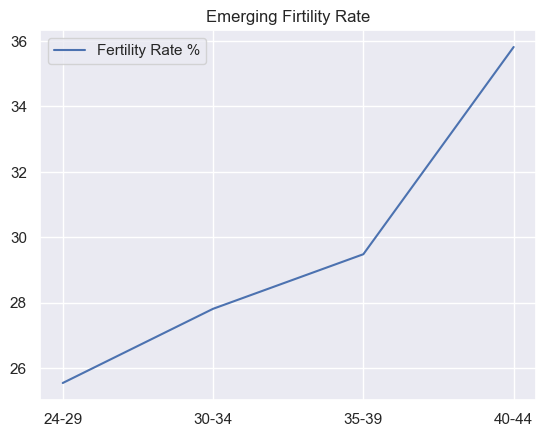

In [165]:
sns.lineplot(data=emerging_fertility)
plt.title('Emerging Firtility Rate')

#### Commuters

In [116]:
#University student count
universty_student =data[(data['Occupation']=='University Student')] 
universty_student_count = len(universty_student)

#70% of employed who are likely commuters
employed = data[(data['Occupation']=='Employed')] 
employed_count = len(employed)* 0.7

total_commuters = round(employed_count + universty_student_count)
percentage_of_commuters = (total_commuters/total_population)*100

print(f'Total commuters of {total_commuters} from a population of {total_population} accounting for {round(percentage_of_commuters,2)}% of the entire population')



Total commuters of 3729 from a population of 8483 accounting for 43.96% of the entire population


#### Immigrants and Emmigrants

In [117]:
#Immigrant are assumed to be people who are employed(obiviously adults), Single and whose relationship to head of house is 'none' or 'lodger'
immigrants = data[(data['Occupation'] == 'Employed') & (data['Marital Status'] == 'Single') & ((data['Relationship to Head of House'] == 'None') | (data['Relationship to Head of House'] == 'Lodger')) ]
immigrants_count = len(immigrants)

#Emmigrants are assummed to be difference btw male and female divorcees
male_divorcee = data[(data['Gender'] == 'Male') & (data['Marital Status'] == 'Divorced') ]
male_divorcee_count = len(male_divorcee)
female_divorcee = data[(data['Gender'] == 'Female') & (data['Marital Status'] == 'Divorced') ]
female_divorcee_count = len(female_divorcee)
emigrants = abs(male_divorcee_count - female_divorcee_count)
print(f'Number of Immigrants and emmigrants respectively are : {immigrants_count}, {emigrants}')

#Per 1000 of the population

crude_immigrants = round((immigrants_count/total_population)*1000,2)
crude_emigrants = round((emigrants/total_population)*1000,2)

print(f'Number of Immigrants and emmigrants per 1000 respectively are : {crude_immigrants}, {crude_emigrants}')

#Is town shrinking or growing?
# A positive value of NIR plus the Crude immigration and emigration will show

population_status = NIR +crude_emigrants+crude_immigrants
print(population_status)

Number of Immigrants and emmigrants respectively are : 621, 192
Number of Immigrants and emmigrants per 1000 respectively are : 73.21, 22.63
110.94999999999999


#### Unemployment Trend

In [159]:
#Unemployed vs employed on same band over some bands for the trend
unemployed_band1 =data[(data['Occupation']=='Unemployed') & (data['Age']>=20) & (data['Age']<=24)]
unemployed_band1_count = len(unemployed_band1)
unemployed_band2 =data[(data['Occupation']=='Unemployed') & (data['Age']>=25) & (data['Age']<=29)]
unemployed_band2_count = len(unemployed_band2)
unemployed_band3 =data[(data['Occupation']=='Unemployed') & (data['Age']>=30) & (data['Age']<=34)]
unemployed_band3_count = len(unemployed_band3)
unemployed_band4 =data[(data['Occupation']=='Unemployed') & (data['Age']>=35) & (data['Age']<=39)]
unemployed_band4_count = len(unemployed_band4)


#Employed on same band

employed_band1 =data[(data['Occupation']=='Employed') & (data['Age']>=20) & (data['Age']<=24)]
employed_band1_count = len(employed_band1)
employed_band2 =data[(data['Occupation']=='Employed') & (data['Age']>=25) & (data['Age']<=29)]
employed_band2_count = len(employed_band2)
employed_band3 =data[(data['Occupation']=='Employed') & (data['Age']>=30) & (data['Age']<=34)]
employed_band3_count = len(employed_band3)
employed_band4 =data[(data['Occupation']=='Employed') & (data['Age']>=35) & (data['Age']<=39)]
employed_band4_count = len(employed_band4)



#Unemployment_rate(UR) accross the bands

UR_band1 = (unemployed_band1_count/employed_band1_count) *100
UR_band2 = (unemployed_band2_count/employed_band2_count) *100
UR_band3 = (unemployed_band3_count/employed_band3_count) *100
UR_band4 = (unemployed_band4_count/employed_band4_count) *100

print(f'Unemployment rate over age band 20-24, 25-29, 30-34 and 35-40 is: {round(UR_band1,2)}, {round(UR_band2,2)}, {round(UR_band3,2)}, {round(UR_band4,2)} respectively')
UR= []
UR.append(UR_band1)
UR.append(UR_band2)
UR.append(UR_band3)
UR.append(UR_band4)



Unemployment rate over age band 20-24, 25-29, 30-34 and 35-40 is: 12.08, 10.15, 12.03, 12.62 respectively


In [162]:
unemployment = pd.DataFrame(UR, index=['20-24', '25-29', '30-34','35-39'], columns= ['Unemployment Rate %'])

In [163]:
unemployment

Unemployment Rate %
20-24            12.077295
25-29            10.150376
30-34            12.026359
35-39            12.618297

Text(0.5, 1.0, 'Unemployment Trend')

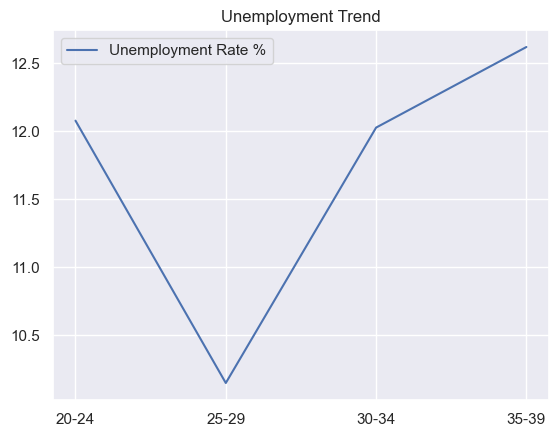

In [166]:
sns.lineplot(data=unemployment)
plt.title('Unemployment Trend')

#### House Occupancy

In [171]:
#Counting the number of people in a house using 'Age' column as everyone has age. 
house_occupancy = data.groupby(['Street','House Number'])['Age'].count().reset_index()
house_occupancy


Street  House Number  Age
0     Aethelredpart Avenue             1    6
1     Aethelredpart Avenue             2    5
2     Aethelredpart Avenue             3    4
3     Aethelredpart Avenue             4    4
4     Aethelredpart Avenue             5    4
...                    ...           ...  ...
2815            Zebra Lane            47    4
2816            Zebra Lane            48    4
2817            Zebra Lane            49    4
2818            Zebra Lane            50    5
2819            Zebra Lane            51    2

[2820 rows x 3 columns]

In [172]:
#Mode class of number in a house indicating the number of people in most houses in the town

house_occupancy['Age'].mode()

0    2
Name: Age, dtype: int64

In [175]:
#Average count of the people in a street (Actual number is the mode)
mode_by_street = house_occupancy.groupby('Street')['Age'].apply(lambda x: x.mode().iloc[0])
mode_by_street

Street
Aethelredpart Avenue    4
Alexander Drive         1
Atlantis Knoll          2
August Lane             2
Baker Road              3
                       ..
Wharf Road              2
White Trafficway        5
Worcester Drive         3
Worcester Junctions     1
Zebra Lane              4
Name: Age, Length: 104, dtype: int64

In [184]:
street_and_house_data = pd.merge(house_occupancy, mode_by_street, on='Street')
street_and_house_data.columns = ['Street Name', 'House Number', 'Occupancy', 'Avg Occupancy']
street_and_house_data['Occupancy - Avg Occupancy'] = street_and_house_data['Occupancy'] - street_and_house_data['Avg Occupancy']
street_and_house_data

Street Name  House Number  Occupancy  Avg Occupancy  \
0     Aethelredpart Avenue             1          6              4   
1     Aethelredpart Avenue             2          5              4   
2     Aethelredpart Avenue             3          4              4   
3     Aethelredpart Avenue             4          4              4   
4     Aethelredpart Avenue             5          4              4   
...                    ...           ...        ...            ...   
2815            Zebra Lane            47          4              4   
2816            Zebra Lane            48          4              4   
2817            Zebra Lane            49          4              4   
2818            Zebra Lane            50          5              4   
2819            Zebra Lane            51          2              4   

      Occupancy - Avg Occupancy  
0                             2  
1                             1  
2                             0  
3                             0  
4                             0  
...                         ...  
2815                          0  
2816                          0  
2817                          0  
2818                          1  
2819                         -2  

[2820 rows x 5 columns]

In [187]:
#Total number of houses

total_number_of_houses = len(street_and_house_data)

#Houses with 'Occupancy-Avg Occupancy >0 are overoccupied'
overoccupied_houses = street_and_house_data[street_and_house_data['Occupancy - Avg Occupancy'] > 0]
count_of_overoccupied_houses =len(overoccupied_houses)


#Houses with 'Occupancy-Avg Occupancy >0 are underoccupied'
underoccupied_houses = street_and_house_data[street_and_house_data['Occupancy - Avg Occupancy'] < 0]
count_of_underoccupied_houses =len(underoccupied_houses)

print(f'Total number of houses = {total_number_of_houses}')
print(f'Total overoccupied houses = {count_of_overoccupied_houses}')
print(f'Total underoccupied houses = {count_of_underoccupied_houses}')


Total number of houses = 2820
Total overoccupied houses = 1000
Total underoccupied houses = 397
